# WHAT DO DATA SCIENTISTS DO

In [155]:
import mysql.connector
import configparser
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [156]:
config = configparser.ConfigParser()
config.read('My_SQL.ini')
try:
    mydb = mysql.connector.connect(
        host = config.get("My_SQL", "host"),
        port = config.get("My_SQL", "port"),
        user = config.get("My_SQL", "user"),
        password = config.get("My_SQL", "password"),
        database = config.get("My_SQL", "database"))
    cur = mydb.cursor(buffered=True)
    print("connected")
except:
    print("unable to connect")

connected


In [157]:
#querying the database to retrieve the required data and converting it into a dataframe
df_act = pd.read_sql_query(
    """
    SELECT d.activity, COUNT(k.respondent_id) AS Number_of_Respondents
    FROM kaggle_respondents_info k
    JOIN respondents_data_science_activities r ON (r.respondent_id = k.respondent_id)
    JOIN data_science_activities d ON (d.activity_id = r.activity_id)
    WHERE k.if_student = 'No'
    GROUP BY activity
    ORDER BY Number_of_Respondents
    """, mydb)
df_act

C:\Users\King Solo\AppData\Local\Temp\ipykernel_2768\3642186807.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,activity,Number_of_Respondents
0,Other,486
1,None of these activities are an important part...,1444
2,Do research that advances the state of the art...,1663
3,Build and/or run a machine learning service th...,2171
4,Experimentation and iteration to improve exist...,2352
5,Build and/or run the data infrastructure that ...,2622
6,Build prototypes to explore applying machine l...,3034
7,Analyze and understand data to influence produ...,4999


In [158]:
#Dropping the Null rows - None
df_act= df_act.drop(index=[1])
df_act.set_index('activity', inplace=True)

In [159]:
df_act

,Number_of_Respondents
activity,
Other,486
Do research that advances the state of the art of machine learning,1663
Build and/or run a machine learning service that operationally improves my product or workflows,2171
Experimentation and iteration to improve existing ML models,2352
"Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data",2622
Build prototypes to explore applying machine learning to new areas,3034
Analyze and understand data to influence product or business decisions,4999


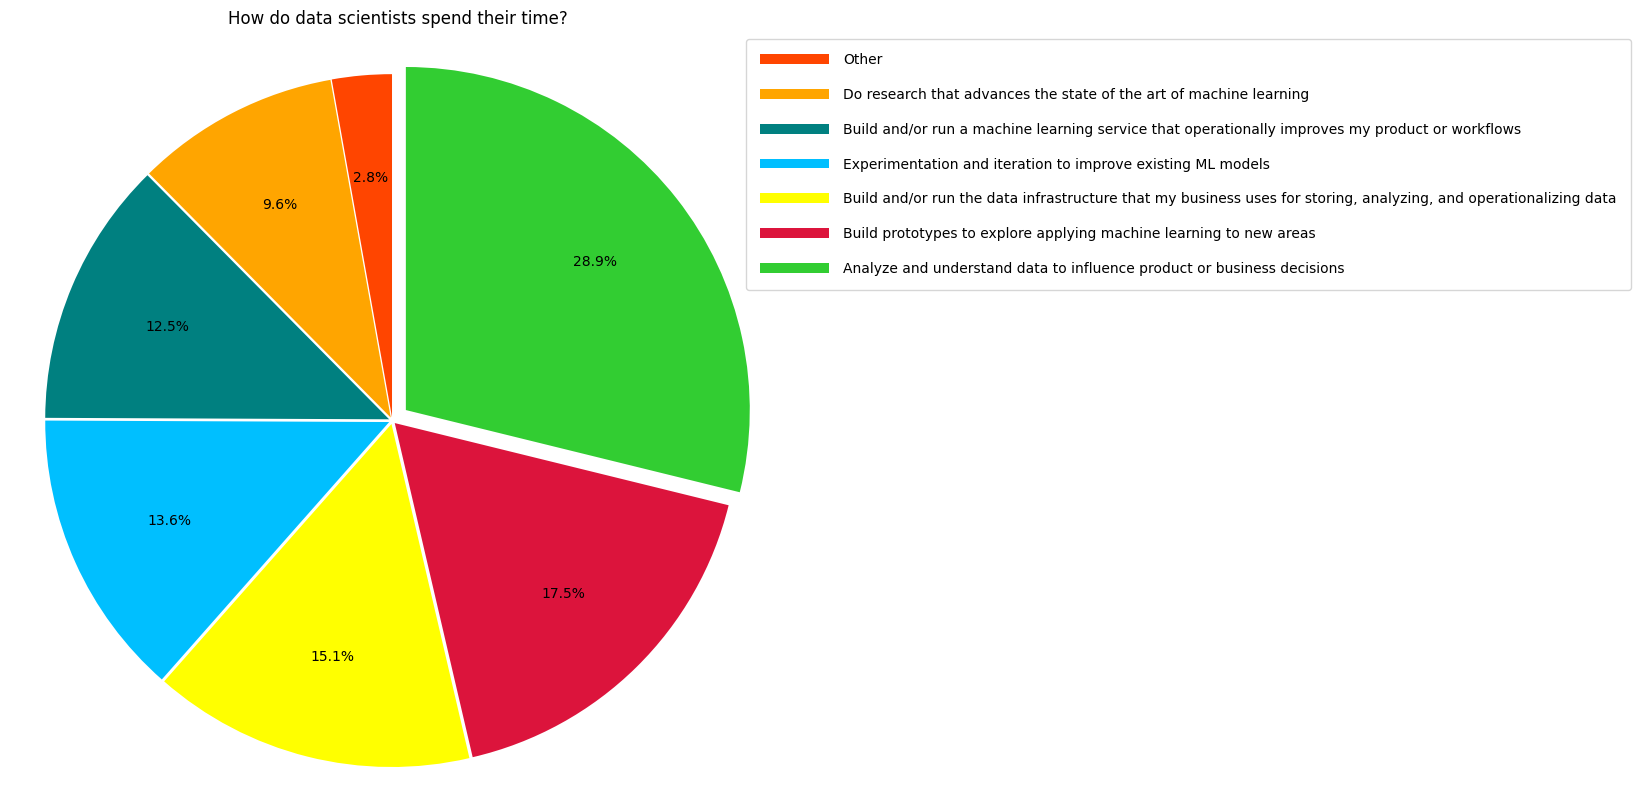

In [160]:
#Pie Chart
my_color_list = ["orangered", "orange", "teal", "deepskyblue", "yellow", "crimson", "limegreen"]
explode_list = [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.05]
df_act['Number_of_Respondents'].plot(kind='pie', figsize = (10,10), 
                                     labels = ['', '', '', '', '', '', '', ''],
                                     autopct = '%1.1f%%', startangle = 90, 
                                     pctdistance = 0.7, colors = my_color_list,
                                     explode = explode_list,
                                    shadow = False)
plt.title('How do data scientists spend their time?')
plt.ylabel('')
plt.axis('equal')
plt.legend(bbox_to_anchor=(2.1,1.0), loc='upper right', labels = df_act.index, 
           handlelength=5, borderpad=1, handletextpad = 1, labelspacing = 1.5)
plt.show()

In [161]:
mydb.close()
cur.close()

True